1. Let's clear the text from stop words

In [30]:
from pathlib import Path
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio.v2 as imageio

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
#! touch "/content/gdrive/My Drive/Propp/Proppfunc.txt"

In [34]:
file_path =  '/content/gdrive/My Drive/Propp/Proppfunc.txt'

In [35]:
#reading on the strings
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [36]:
#split paragraphs
paragraphs = text.split('\n\n')

In [42]:
#list of func
all_functions = []
for paragraph in paragraphs:
    #split each paragraph on functions on commas and adding to the general list
    functions = [func.strip().replace('\n', '') for func in paragraph.split(', ')]
    all_functions.extend(functions)

In [43]:
#counting the frequency of the function
function_counts = Counter(all_functions)
top10 = function_counts.most_common(10)

3. Creating a dataframe of stop 10 functions in the text

In [44]:
#creating new df
df = pd.DataFrame(top10, columns=['word', 'count'])

4. Creating a histogram (listing)

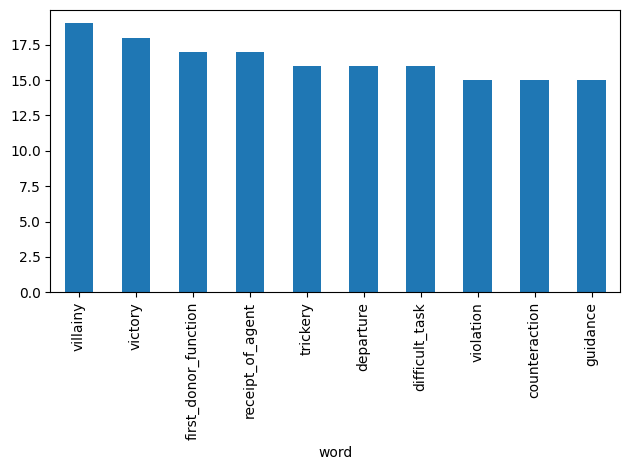

In [45]:
#creating hist
%matplotlib inline
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

In [46]:
#creating mask
mask_image = imageio.imread('/content/gdrive/My Drive/Propp/mask.jpeg')
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, max_words=100, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(function_counts)

In [47]:
#save
wordcloud.to_file('/content/gdrive/My Drive/Propp/mask_3.jpeg')

5. Creating a Word cloud (listing)

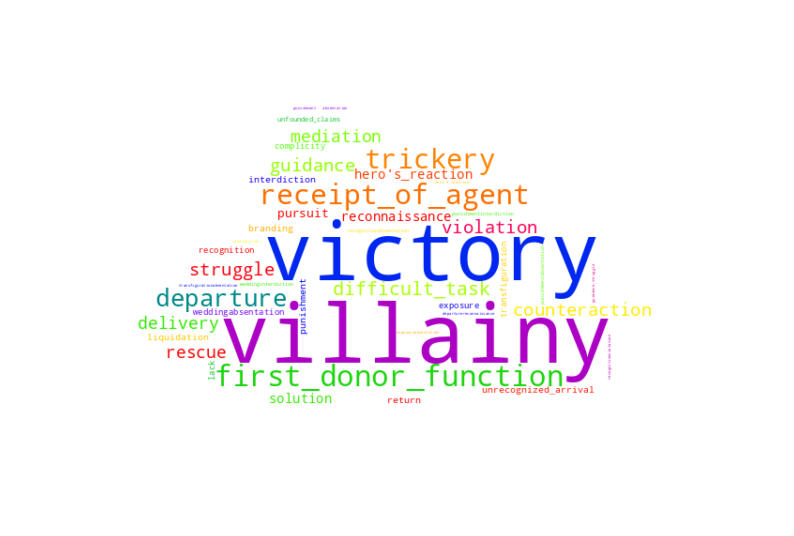

In [48]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()